# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [33]:
# Dependencies and Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_df= pd.merge(mouse_metadata, study_results)
# Display the data table for preview
pyma_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
pyma_df_dropped_na = pyma_df.dropna()
pyma_df_dropped_na

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4








# Checking the number of mice.



In [35]:
#check number of mice
number_of_mice = len(mouse_metadata)
number_of_mice


249

In [36]:
#Find the duplicates from each data set

#Mouse
duplicates = mouse_metadata[mouse_metadata.duplicated()]
print(duplicates)

#Study
duplicates = study_results[study_results.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137     g989          0                45.0                 0


In [37]:
#Drop duplicate from mouse data
clean = mouse_metadata.drop(mouse_metadata.index[137])
clean

#Number Of Mice after duplicate dropped
number_of_mice_clean = len(clean)
number_of_mice_clean

248

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id_number = pyma_df[pyma_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_id_number

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_id_number)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id_number = pyma_df[pyma_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_id_number

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_id_number = pyma_df[pyma_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_id_number

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_id_number)



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [43]:
# Create a clean DataFrame 
pyma_df_clean = pd.merge(clean, study_results)
pyma_df_clean.dropna()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [44]:



# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = pyma_df_clean.describe()
summary_statistics


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,12.787042,25.655337,19.556559,50.431117,1.022836
std,7.198698,3.930812,14.076320,8.901081,1.140506
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,26.000000,20.000000,48.937012,1.000000
75%,20.000000,29.000000,30.000000,56.287906,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [45]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#get the names of each drug regimen
drug_regimen = pyma_df_clean.groupby("Drug Regimen")
print(drug_regimen)

drug_regimen.describe()



Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          176.0  11.659091  6.745812  2.0   7.00   9.0  20.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          176.0  27.176136  ...          59.874682  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                176.0  1.204545  1.243581  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

In [46]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# Group the data by the "Drug Regimen" column
grouped_data = pyma_df_clean.groupby("Drug Regimen")

# Calculate the mean, median, min, max, and standard deviation for each drug regimen
mean = grouped_data["Tumor Volume (mm3)"].mean()
median = grouped_data["Tumor Volume (mm3)"].median()
min = grouped_data["Tumor Volume (mm3)"].min()
max = grouped_data["Tumor Volume (mm3)"].max()
std = grouped_data["Tumor Volume (mm3)"].std()

# Combine the results into a single DataFrame
results = pd.concat([mean, median, min, max, std], axis=1)

# Rename the columns for clarity
results.columns = ["Mean", "Median", "Min", "Max", "Std Dev"]

# Display the results
print(results)


                   Mean     Median        Min        Max   Std Dev
Drug Regimen                                                      
Capomulin     40.675741  41.557809  23.343598  48.158209  4.994774
Ceftamin      52.591172  51.776157  45.000000  68.923185  6.268188
Infubinol     52.884795  51.820584  36.321346  72.226731  6.567243
Ketapril      55.235638  53.698743  45.000000  78.567014  8.279709
Naftisol      54.367503  52.509285  45.000000  76.668817  8.199619
Placebo       54.033581  52.288934  45.000000  73.212939  7.821003
Propriva      52.322552  50.854632  45.000000  72.455421  6.507770
Ramicane      40.216745  40.673236  22.050126  47.622816  4.846308
Stelasyn      54.233149  52.431737  45.000000  75.123690  7.710419
Zoniferol     53.236507  51.818479  45.000000  73.324432  6.966589


In [47]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped = pyma_df_clean.groupby("Drug Regimen")
tumor_vol = grouped["Tumor Volume (mm3)"]
summary_stats = tumor_vol.describe()
summary_stats


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,176.0,54.367503,8.199619,45.000000,47.356339,52.509285,59.874682,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [48]:
summary_stats = pd.DataFrame({
    "mean": tumor_vol.mean(),
    "median": tumor_vol.median(),
    "variance": tumor_vol.var(),
    "std deviation": tumor_vol.std(),
    "SEM": tumor_vol.sem()
})
summary_stats

,mean,median,variance,std deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.367503,52.509285,67.233750,8.199619,0.618070
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Using the aggregation method, produce the same summary statistics in a single line

pyma_df_clean["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])


mean      50.431117
median    48.937012
var       79.229236
std        8.901081
sem        0.205125
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

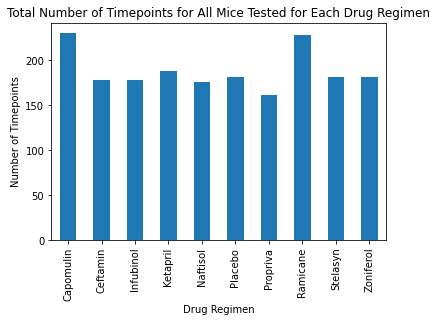

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


pyma_df_clean.groupby("Drug Regimen").count()["Timepoint"].plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.show()


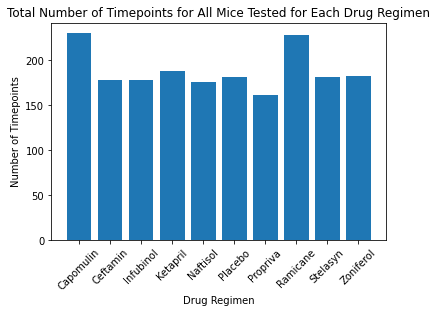

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group the data by "Drug Regimen" and count the number of timepoints
drug_regimen = pyma_df_clean.groupby("Drug Regimen").count()["Timepoint"]

# Get the x-axis labels (drug regimens)
x_labels = np.array(drug_regimen.index)

# Get the y-axis values (number of timepoints)
y_values = np.array(drug_regimen.values)

# Create the bar plot
plt.bar(x_labels, y_values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()


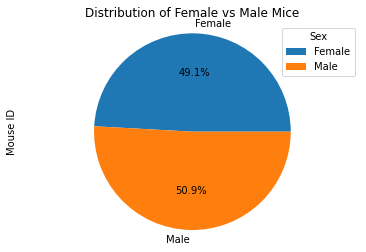

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by "Sex" and count the number of mice
sex_group = pyma_df_clean.groupby("Sex").count()["Mouse ID"]

# Plot the pie chart
sex_group.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Make the plot an equal circle
plt.legend(title="Sex")
plt.title("Distribution of Female vs Male Mice")
plt.show()



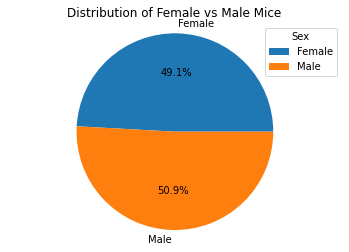

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by "Sex" and count the number of mice
sex_group = pyma_df_clean.groupby("Sex").count()["Mouse ID"]

# Get the labels and values for the pie chart
labels = np.array(sex_group.index)
values = np.array(sex_group.values)

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Make the plot an equal circle
plt.legend(title="Sex")
plt.title("Distribution of Female vs Male Mice")
plt.show()





## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pyma_df_clean.groupby("Mouse ID").max()["Timepoint"]

# Merge the max_timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_timepoint.to_frame().merge(pyma_df_clean, on=["Mouse ID", "Timepoint"], how="left")

# Filter the merged DataFrame to include only the desired regimens
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_df = merged_df[merged_df["Drug Regimen"].isin(regimens)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Get the final tumor volume for each mouse
final_tumor_volume = final_tumor_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
final_tumor_volume


Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [55]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumor_vol_data = pyma_df_clean["Tumor Volume (mm3)"]
quartiles = tumor_vol_data.describe()
lower_q = quartiles["25%"]
upper_q = quartiles["75%"]
iqr = upper_q - lower_q


print(f"The lower quartile occupancy is: {lower_q}")
print(f"The upper quartile occupancy is: {upper_q}")
print(f"The interquartile range of occupancy is: {iqr}")
#print(f"The median of occupancy is {quartiles[0.5]}")


lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values below {upper_bound} could be outliers.")


for regimen in regimens:
    regimen_df = pyma_df[pyma_df["Drug Regimen"] == regimen]
    regimen_tumor_volumes = regimen_df["Tumor Volume (mm3)"]
    
# do something with the tumor volumes




 # Determine outliers using upper and lower bounds\
outliers = pyma_df[(pyma_df["Tumor Volume (mm3)"] < lower_bound) | 
                   (pyma_df["Tumor Volume (mm3)"] > upper_bound)]


The lower quartile occupancy is: 45.0
The upper quartile occupancy is: 56.287906109999994
The interquartile range of occupancy is: 11.287906109999994


NameError: name 'q1' is not defined

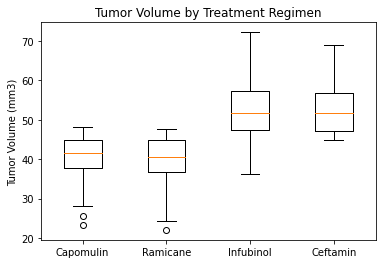

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')

data = [pyma_df_clean[pyma_df_clean
                      
                      ['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in regimens]
ax1.boxplot(data, labels=regimens)
plt.show()


## Line and Scatter Plots

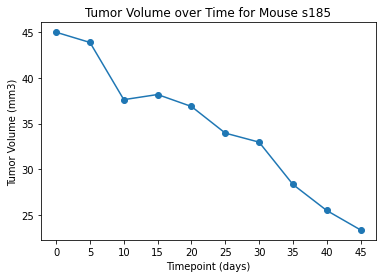

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# choose the first mouse treated with Capomulin
mouse = pyma_df_clean[pyma_df_clean['Drug Regimen'] == 'Capomulin'].iloc[0,0] 
# get data for the chosen mouse
mouse_df = pyma_df_clean[pyma_df_clean['Mouse ID'] == mouse] 

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], '-o')
plt.title('Tumor Volume over Time for Mouse ' + mouse)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(np.arange(0, mouse_df['Timepoint'].max()+5, 5))
plt.show()


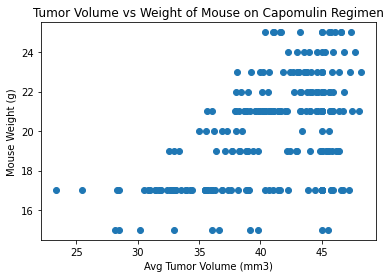

In [58]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


capomulin_df = pyma_df_clean[pyma_df_clean['Drug Regimen'] == 'Capomulin']
plt.scatter(capomulin_df['Tumor Volume (mm3)'], capomulin_df['Weight (g)'])
plt.title("Tumor Volume vs Weight of Mouse on Capomulin Regimen")
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.show()



In [59]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1442,r157,Capomulin,Male,22,25,0,45.000000,0
1443,r157,Capomulin,Male,22,25,5,45.597064,0
1444,r157,Capomulin,Male,22,25,10,46.059608,0


## Correlation and Regression

In [60]:
# Filter the data to only include the Capomulin regimen and find the mean
mean_tumor_volume = capomulin_df.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean().reset_index()

# Add the average tumor volume to the dataframe
capomulin_final = pd.merge(capomulin_df, mean_tumor_volume, on='Mouse ID', how='left')

# Compute the correlation between mouse weight and average tumor volume
correlation = capomulin_final["Weight (g)"].corr(capomulin_final["Tumor Volume (mm3)_y"])

print("The correlation coefficient between mouse weight and average tumor volume is:", correlation)


The correlation coefficient between mouse weight and average tumor volume is: 0.8343958614425966


In [61]:
capomulin_final = capomulin_df.loc['Mean Tumor Volume (mm3)'] = capomulin_df.groupby(['Mouse ID'])["Tumor Volume (mm3)"].transform('mean')
result = capomulin_df.dropna()
#Final DataFrame
result


/Users/admin/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3.0,17.0,0.0,45.000000,0.0
11,s185,Capomulin,Female,3.0,17.0,5.0,43.878496,0.0
12,s185,Capomulin,Female,3.0,17.0,10.0,37.614948,0.0
13,s185,Capomulin,Female,3.0,17.0,15.0,38.177232,0.0
14,s185,Capomulin,Female,3.0,17.0,20.0,36.866876,0.0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1.0,24.0,45.0,47.685963,1.0
1442,r157,Capomulin,Male,22.0,25.0,0.0,45.000000,0.0
1443,r157,Capomulin,Male,22.0,25.0,5.0,45.597064,0.0
1444,r157,Capomulin,Male,22.0,25.0,10.0,46.059608,0.0


In [62]:
pyma_df.dropna()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Plot the relationship between mouse weight and average tumor volume

# Plot the relationship between mouse weight and average tumor volume
plt.plot(capomulin_final['Weight (g)'], capomulin_final['Mean Tumor Volume (mm3)'], 'o')
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Mouse weight vs. average tumor volume for the Capomulin regimen')
plt.show()

# Fit a linear regression model to the data
slope, intercept = np.polyfit(capomulin_final['Weight (g)'], capomulin_final['Mean Tumor Volume (mm3)'], 1)









# plt.plot(capomulin['Weight (g)'], capomulin['Mean Tumor Volume (mm3)'], '0')
# plt.xlabel('Weight (g)')
# plt.ylabel('Mean Tumor Volume (mm3)')
# plt.title('Mouse weight vs. average tumor volume for the Capomulin regimen')
# plt.show()

# # Fit a linear regression model to the data
# slope, intercept = np.polyfit(capomulin['Weight (g)'], capomulin['Mean Tumor Volume (mm3)'], 1)

# Create a function for the line of best fit
def line_of_best_fit(x):
  return slope * x + intercept

# Plot the relationship between mouse weight and average tumor volume with the line of best fit
plt.plot(capomulin_final['Weight (g)'], capomulin_final['Mean Tumor Volume (mm3)'],'o')
x = np.linspace(capomulin_final['Weight (g)'].min(), capomulin_final['Weight (g)'].max(), 100)
y = line_of_best_fit(x)
plt.plot(x, y, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Mouse weight vs. average tumor volume for the Capomulin regimen with line of best fit')
plt.show()


KeyError: 'Weight (g)'

In [64]:
#linear regression
slope, intercept = np.polyfit(capomulin['Weight (g)'], capomulin['Mean Tumor Volume (mm3)'], 1)

#Create function for line of best fit
def line_of_best_fit(x):
    return slope * x + intercept


#Plot the relationship between mouse weight and average tumor volume with the line of best fit


plt.scatter(x=capomulin['Weight (g)'], y=capomulin['Mean Tumor Volume (mm3)'])
x = np.linspace(capomulin['Weight (g)'].min(), capomulin['Weight (g)'].max(), 100)
y = line_of_best_fit(x)
plt.plot(x, y, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')
plt.title('Mouse weight vs. average tumor volume for the Capomulin regimen with line of best fit')
plt.show()

NameError: name 'capomulin' is not defined